# DSCI 303 - Project 04

### Samuel Risenhoover

**Due Sunday, June 28th, at 11:59 PM**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report

## Part 1: Loading the Datataset, Preliminary Analysis

The purpose of this section is to load in the the dtaset, and do some basic analysis on the dataset, to obtain some informaiton about the structure of our data.

In [2]:
fc = pd.read_csv('forest_cover.txt', sep ='\t')

fc.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


We will now determine the size of the dataset, which contains 15120 entries, each with 13 features.

In [3]:
fc.shape

(15120, 13)

We will now inspect the distribution of cover types in the dataset.

In [4]:
fc.Cover_Type.value_counts().sort_index()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

Now we will create a color pallette that will be used in later plots.

In [5]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

## Part 2: Distribution of Cover Type by Wilderness Area

We will start by determining the distribution of wilderness areas in our dataset.

In [6]:
fc.Wilderness_Area.value_counts().sort_index()

Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: Wilderness_Area, dtype: int64

We will now create a dataframe to determine how many regions of each cover type are in the four wilderness areas.

In [7]:
ct_by_wa = pd.crosstab(fc.Cover_Type, fc.Wilderness_Area)

ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


We will now display the above information in the form of a stacked bar chart.

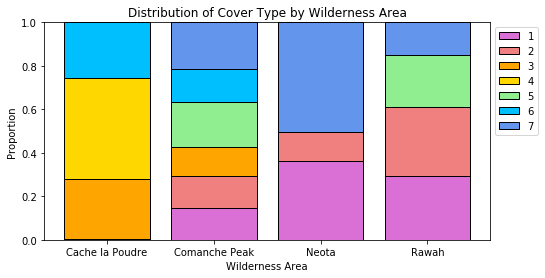

In [8]:
ct_by_wa_props = ct_by_wa / ct_by_wa.sum()

bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props

plt.figure(figsize = [8,4])

for i in range(len(ct_by_wa_props)):
    
    plt.bar(ct_by_wa_props.columns, ct_by_wa_props.iloc[i, :], 
            bottom=bb.iloc[i,:], 
            edgecolor='k', color= palette[i],
            label = ct_by_wa_props.index[i])

plt.legend(bbox_to_anchor = (1,1))
plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Wilderness Area')
plt.show()

## Part 3: Distribution of Cover Type by Soil Type

We will begin by creating a DataFrame to examine the number of regions of each cover type there are ffor each of the 40 soil types.

In [9]:
ct_by_st = pd.crosstab(fc.Cover_Type, fc.Soil_Type)

ct_by_st

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


We will display the above information in the form of a stacked bar chart.

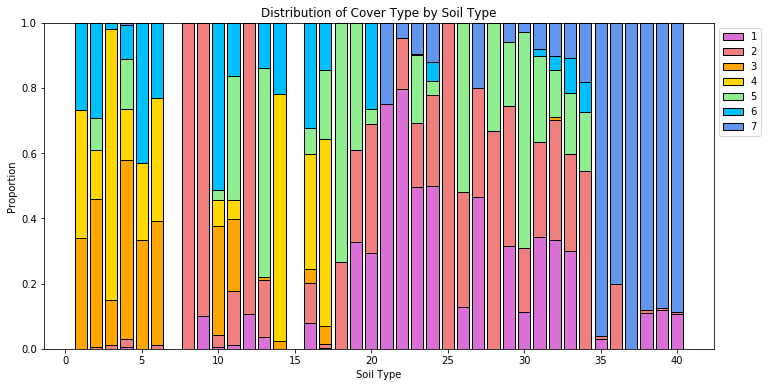

In [10]:
ct_by_st_props = ct_by_st / ct_by_st.sum()

bb = np.cumsum(ct_by_st_props) - ct_by_st_props

plt.figure(figsize = [12,6])

for i in range(len(ct_by_st_props)):
    
    plt.bar(ct_by_st_props.columns, ct_by_st_props.iloc[i, :], 
            bottom=bb.iloc[i,:], 
            edgecolor='k', color= palette[i],
            label = ct_by_st_props.index[i])

plt.legend(bbox_to_anchor = (1,1))
plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Soil Type')
plt.show()

## Part 4: Distribution of Elevation by Cover Type

We will start by calculating the average elevation for each of the seven cover types.

In [24]:
fc.loc[:,['Elevation', 'Cover_Type']].groupby('Cover_Type').mean().round(2)

,Elevation
Cover_Type,
1,3128.03
2,2922.54
3,2398.42
4,2223.42
5,2786.80
6,2423.28
7,3362.77


We will now create histograms to display the the distribution of elevations for each of the seven cover types.

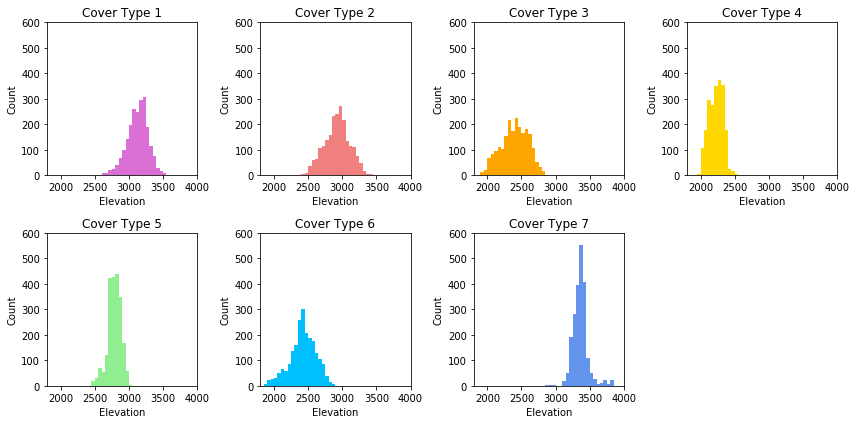

In [12]:
plt.figure(figsize = [12,6])

for i in range(0,7):
    
    plt.subplot(2,4,i+1)
    
    plt.hist(fc.loc[fc.Cover_Type == i+1, 'Elevation'],
             bins = np.arange(1800,4050,50), color = palette[i])
    plt.title('Cover Type ' + str(i+1))
    plt.xlim([1800,4000])
    plt.ylim([0,600])
    plt.xlabel('Elevation')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Part 5: Creating Training, Validation, and Test Sets

We will start by separating the categorical features, numerical features, and labels.

In [25]:
X_num = fc.drop(['Wilderness_Area', 'Soil_Type', 'Cover_Type'], axis = 1).values
X_cat = fc.loc[:, ['Wilderness_Area', 'Soil_Type']].values
y = fc.Cover_Type.values

print('Numerical Feature Array Shape:   ' + str(X_num.shape))
print('Categorical Feature Array Shape: ' + str(X_cat.shape))
print('Label Array Shape:               ' + str(y.shape))

Numerical Feature Array Shape:   (15120, 10)
Categorical Feature Array Shape: (15120, 2)
Label Array Shape:               (15120,)


We will not encode the catagorical variables using one-hot encoding

In [26]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_cat)
X_enc = encoder.transform(X_cat)

print('Encoded Feature Array Shape:' + str(X_enc.shape))

Encoded Feature Array Shape:(15120, 42)


We will now combine the numerical features with the encoded features.

In [27]:
X = np.hstack([X_num, X_enc])

print('Feature Array Shape: ' + str(X.shape))

Feature Array Shape: (15120, 52)


We will now split the data into trianing, validation, and testing sets, using a 70/15/15 split.

In [28]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size = 0.5, random_state = 1, stratify = y_hold)

print('Training Features Shape:   ' + str(X_train.shape))
print('Validation Features Shape: ' + str(X_valid.shape))
print('Test Features Shape:       ' + str(X_test.shape))

Training Features Shape:   (10584, 52)
Validation Features Shape: (2268, 52)
Test Features Shape:       (2268, 52)


## Part 6: Logistic Regression Model

Here we will create and evaluate a logistic regression model to predict cover type.

In [29]:
lr_mod = LogisticRegression(solver='lbfgs', penalty='none',
                            max_iter = 1000, multi_class= 'multinomial')
lr_mod.fit(X_train, y_train)

X_train_acc = lr_mod.score(X_train, y_train)
X_test_acc = lr_mod.score(X_valid, y_valid)

print('Training Accuracy:', round(X_train_acc,4))
print('Validation Accuracy: ', round(X_test_acc,4))

Training Accuracy: 0.618
Validation Accuracy:  0.6204


C:\Users\risen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Part 7: Decision Tree Models

Below we will create and evaluate several decision tree models.

In [30]:
dt_train_acc = []
dt_valid_acc = []

depth_range = range(2,31)

for i in depth_range:
    np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth = i)
    temp_tree.fit(X_train, y_train)
    
    temp_score_t = temp_tree.score(X_train,y_train)
    temp_score_v = temp_tree.score(X_valid, y_valid)
    dt_train_acc.append(temp_score_t)
    dt_valid_acc.append(temp_score_v)
    

dt_idx = np.argmax(dt_valid_acc)
dt_opt_depth = depth_range[dt_idx]

tree_1 = DecisionTreeClassifier(max_depth = dt_opt_depth)
tree_1.fit(X_train, y_train)

opt_train_score = tree_1.score(X_train, y_train)
opt_valid_score = tree_1.score(X_valid, y_valid)

print('Optimal value for max_depth:          ', dt_opt_depth)
print('Training Accuracy for Optimal Model:  ', round(opt_train_score,4))
print('Validation Accuracy for Optimal Model:', round(opt_valid_score,4))

Optimal value for max_depth:           18
Training Accuracy for Optimal Model:   0.9804
Validation Accuracy for Optimal Model: 0.7747


We will now plot the training and validation curves as a function of max_depth.

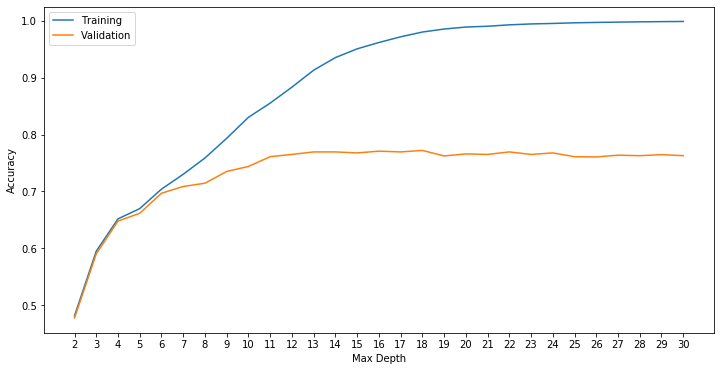

In [31]:
plt.figure(figsize = [12,6])
plt.plot(depth_range,  dt_train_acc, label = 'Training')
plt.plot(depth_range, dt_valid_acc, label = 'Validation')

plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)
plt.show()

## Part 8: Random Forest Models

Below we will create adn evalulate several random forest models.

In [32]:
rf_train_acc = []
rf_valid_acc = []

for i in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(n_estimators = 100, max_depth = i)
    temp_forest.fit(X_train, y_train)
    
    rf_train_acc.append(round(temp_forest.score(X_train, y_train),4))
    rf_valid_acc.append(round(temp_forest.score(X_valid, y_valid),4))

rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]

forest_1 = RandomForestClassifier(n_estimators = 100, max_depth = rf_opt_depth)
forest_1.fit(X_train, y_train)

rf_opt_train_score = forest_1.score(X_train, y_train)
rf_opt_valid_score = forest_1.score(X_valid, y_valid)

print('Optimal value for max_depth:          ', rf_opt_depth)
print('Training Accuracy for Optimal Model:  ', round(rf_opt_train_score,4))
print('Validation Accuracy for Optimal Model:', round(rf_opt_valid_score,4))

Optimal value for max_depth:           28
Training Accuracy for Optimal Model:   1.0
Validation Accuracy for Optimal Model: 0.8673


We will now plot the training and validation curves as a function of max_depth.

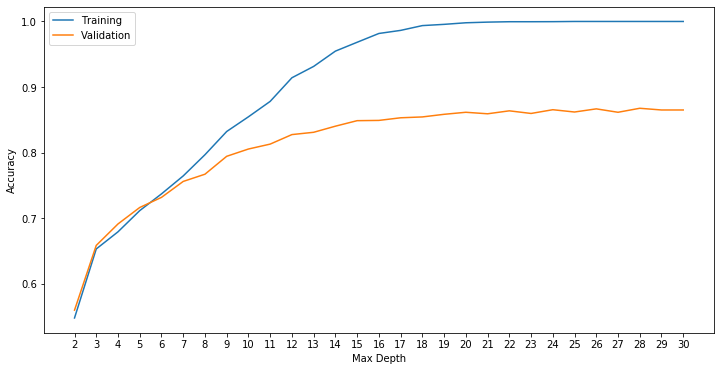

In [33]:
plt.figure(figsize = [12,6])
plt.plot(depth_range,  rf_train_acc, label = 'Training')
plt.plot(depth_range, rf_valid_acc, label = 'Validation')

plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)
plt.show()

## Part 9: Create and Evalulate Final Model

Below I will create and evaluate the final model, based on the tests done above. The model that has been chosen is the Random Forest model, as it scored the highest on the validation set. The max_depth variabel will be det to 28, as determined by the testing done. 

In [34]:
np.random.seed(1)

final_model = RandomForestClassifier(max_depth = 28)
final_model.fit(X_train, y_train)

rf_train_score = final_model.score(X_train, y_train)
rf_valid_score = final_model.score(X_valid, y_valid)
rf_test_score = final_model.score(X_test, y_test)

print('Training Accuracy for Fianl Model:  ', round(rf_train_score,4))
print('Validation Accuracy for Final Model:', round(rf_valid_score,4))
print('Testing Accuracy for Fianl Model:   ', round(rf_test_score,4))

Training Accuracy for Fianl Model:   1.0
Validation Accuracy for Final Model: 0.8677
Testing Accuracy for Fianl Model:    0.8593


Now I will create and display a confusion matrix for the final model on the test set. 

In [38]:
test_pred = final_model.predict(X_test)

cm = confusion_matrix(y_test, test_pred)

cm_df = pd.DataFrame(cm)
cm_df.columns = range(1,8)
cm_df.index = range(1,8)
cm_df

,1,2,3,4,5,6,7
1,236,63,2,0,5,0,18
2,53,239,6,0,13,10,3
3,0,2,262,18,2,40,0
4,0,0,6,313,0,5,0
5,0,11,4,0,305,4,0
6,0,0,33,11,1,279,0
7,8,1,0,0,0,0,315


We will now create a classification report to further display the effectiveness of the model.

In [37]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           1       0.79      0.73      0.76       324
           2       0.76      0.74      0.75       324
           3       0.84      0.81      0.82       324
           4       0.92      0.97      0.94       324
           5       0.94      0.94      0.94       324
           6       0.83      0.86      0.84       324
           7       0.94      0.97      0.95       324

    accuracy                           0.86      2268
   macro avg       0.86      0.86      0.86      2268
weighted avg       0.86      0.86      0.86      2268

